<a href="https://colab.research.google.com/github/AnanyaSharma2/MachineLearning/blob/main/Project/HumanActivityPrediction/HumanActivityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [5]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [7]:
train.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
6002,0.314546,0.003091,-0.079625,-0.443819,-0.150654,-0.291282,-0.456789,-0.181451,-0.304442,-0.257059,...,-0.636082,-0.236787,-0.255432,-0.558631,0.066144,-0.871556,0.185138,0.036665,27,WALKING
3691,0.282593,-0.014729,-0.113073,-0.988792,-0.967902,-0.979663,-0.990011,-0.972861,-0.982064,-0.932500,...,-0.351394,-0.030502,-0.239791,-0.710071,0.513002,0.594198,-0.576566,-0.427567,19,LAYING
3187,0.293261,-0.023525,-0.032613,-0.372487,-0.423219,-0.101452,-0.369648,-0.463183,-0.112522,-0.329410,...,-0.173804,0.045868,-0.653364,-0.253606,0.495939,-0.791810,0.018790,0.145608,16,WALKING
2225,0.294588,0.011366,-0.095926,-0.984849,-0.903138,-0.951164,-0.987345,-0.899591,-0.951813,-0.917221,...,-0.923324,0.019573,0.276676,0.625885,0.612619,-0.696680,0.224360,0.190685,14,STANDING
7109,0.403841,-0.094826,-0.121561,-0.042121,-0.132786,-0.231412,-0.096837,-0.171354,-0.197780,0.356278,...,-0.839846,-0.436214,-0.496141,-0.787703,-0.236855,-0.875162,0.184379,0.013107,30,WALKING_DOWNSTAIRS


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


## **Data Wrangling**

Checking Duplicates

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

Checking Missing Values

In [13]:
print("No. of Null Values in train dataset",train.isna().values.sum())
print("No. of Null Values in test dataset",test.isna().values.sum())

No. of Null Values in train dataset 0
No. of Null Values in test dataset 0


Checking for class imbalance

<Axes: xlabel='count', ylabel='Activity'>

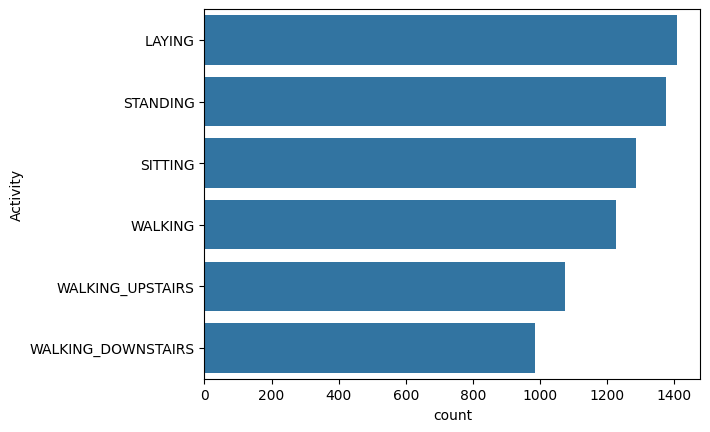

In [17]:
sns.countplot(train['Activity'],order = train['Activity'].value_counts().index)

There is no class imbalance in this data.

## **EDA**

In [23]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient='index').rename(columns={0:'count'})


,count
tBodyAcc,40
tGravityAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tBodyAccMag,13
tGravityAccMag,13
tBodyAccJerkMag,13
tBodyGyroMag,13
tBodyGyroJerkMag,13


Features in the dataset


*   Acceleration

*   Gyroscope
*   Angle


*   Subject

*   Activity



>Mainly there are 'acceleration' and 'gyroscope' features.








Analysing tBodyAccMag Feature

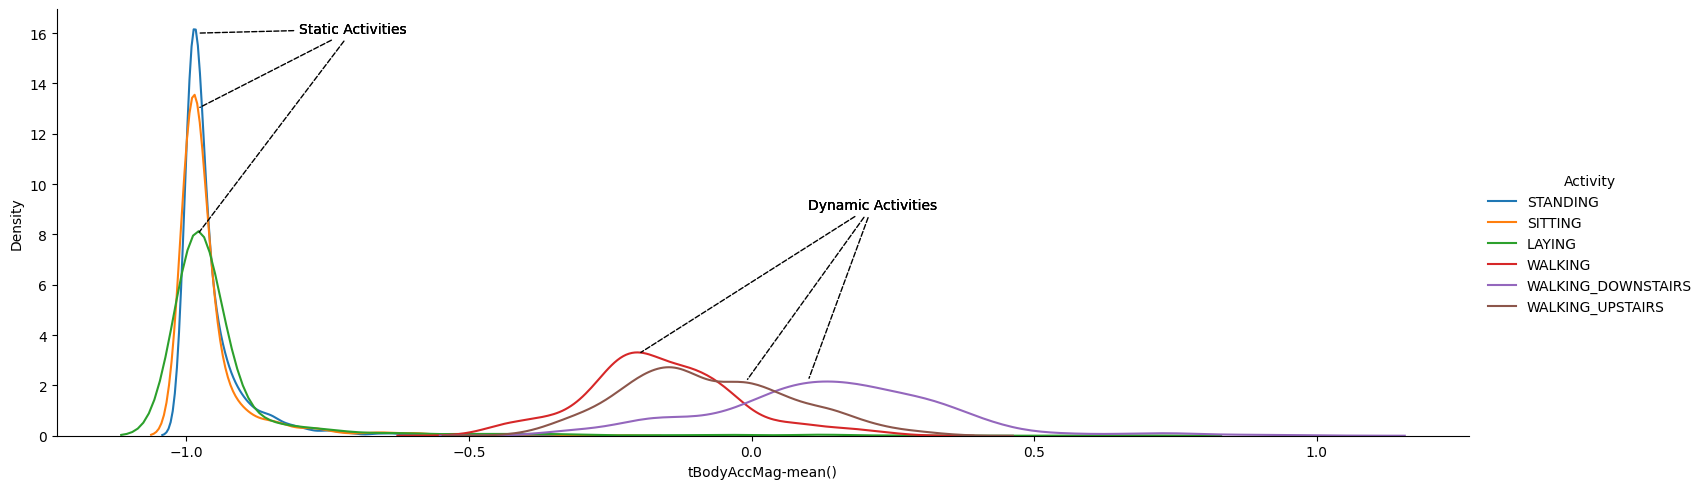

In [24]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

Static and dynamic activities :

SITTING, STANDING, LAYING can be considered as static activities with no motion involved

WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved

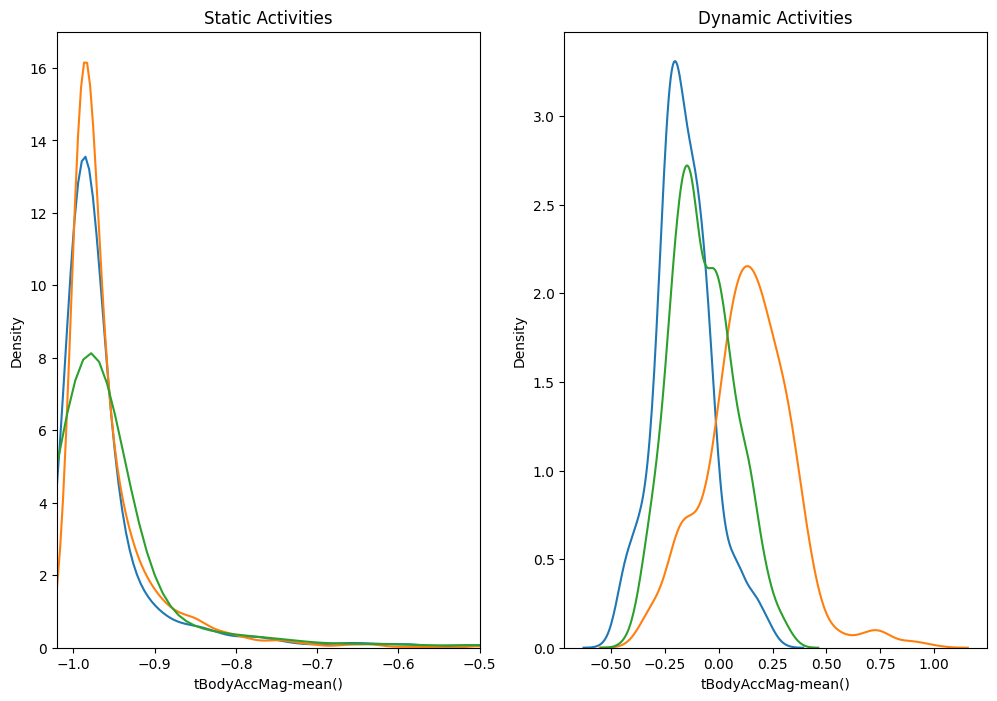

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

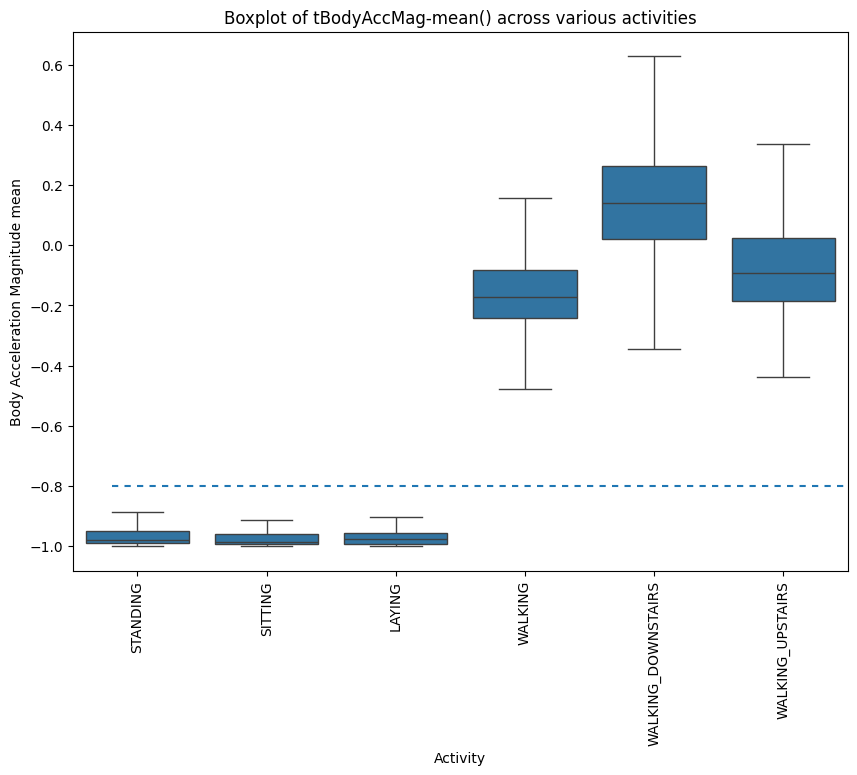

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.xticks(rotation=90)
plt.show()

 **Analysing Angle between X-axis and gravityMean feature**

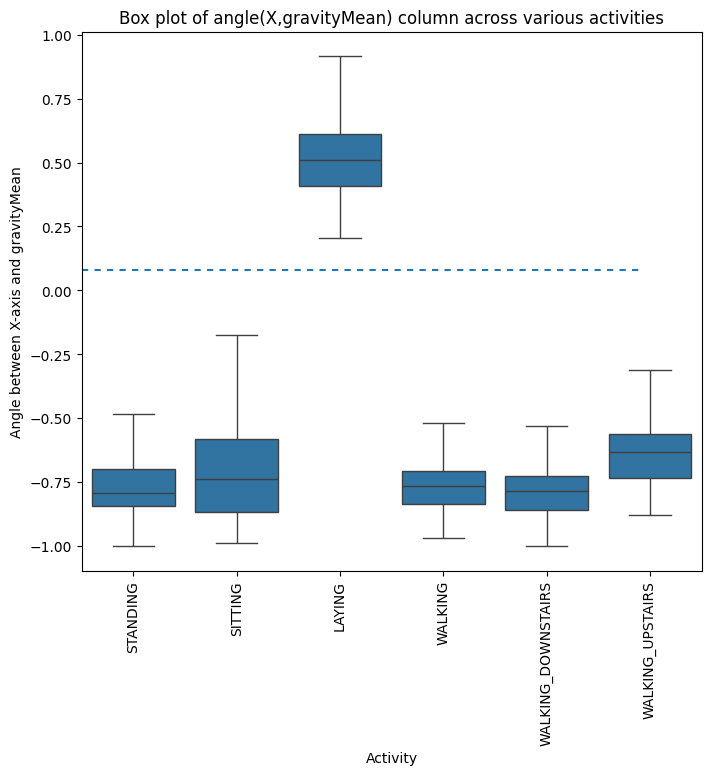

In [35]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.0, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) across various activities')
plt.xticks(rotation = 90)
plt.show()

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.

if(angle(X,gravityMean)>0.00):
    Activity = "LAYING"
else:
    other activities

Analysing Angle between Y-axis and gravityMean feature

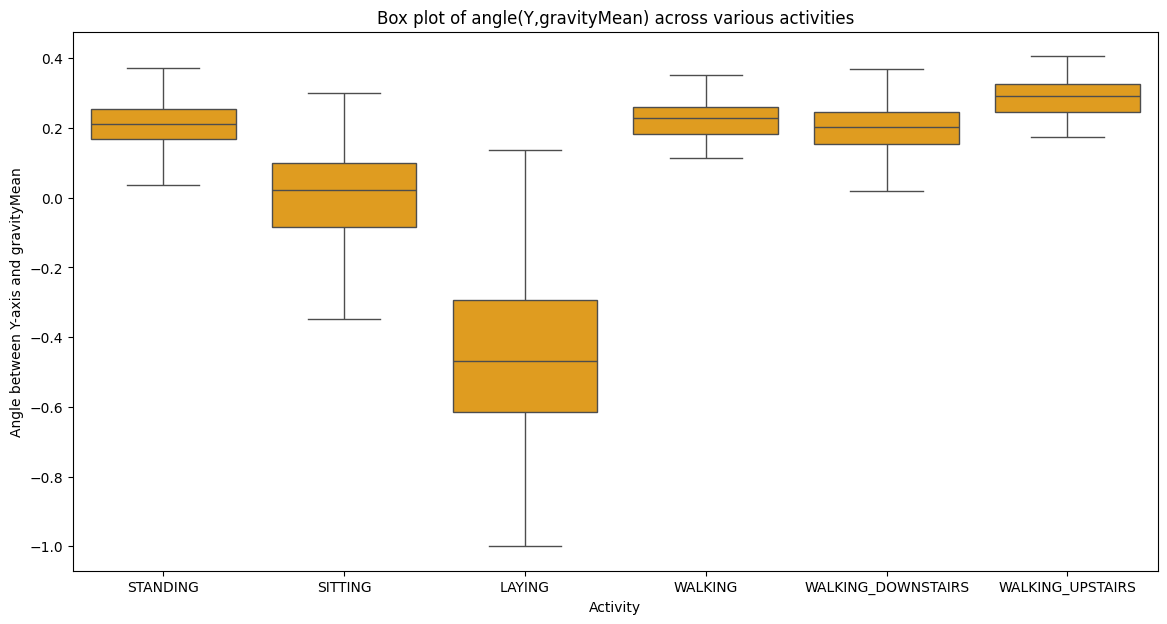

In [50]:
plt.figure(figsize=(14,7))
sns.boxplot(data=train,x='Activity',y= 'angle(Y,gravityMean)',showfliers = False,color = 'orange')
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) across various activities')
plt.show()


## **Feature reduction Using PCA**

In [47]:
x_pca = train.drop(['subject','Activity'] , axis=1)

In [51]:
pca = PCA(n_components=2).fit(x_pca).transform(x_pca)

In [52]:
pca

array([[-5.5202803 , -0.29027757],
       [-5.53534954, -0.08253026],
       [-5.47498801,  0.28738704],
       ...,
       [ 5.85750527, -3.08184351],
       [ 5.42109482, -3.42643018],
       [ 5.49797027, -2.78992873]])

<Axes: >

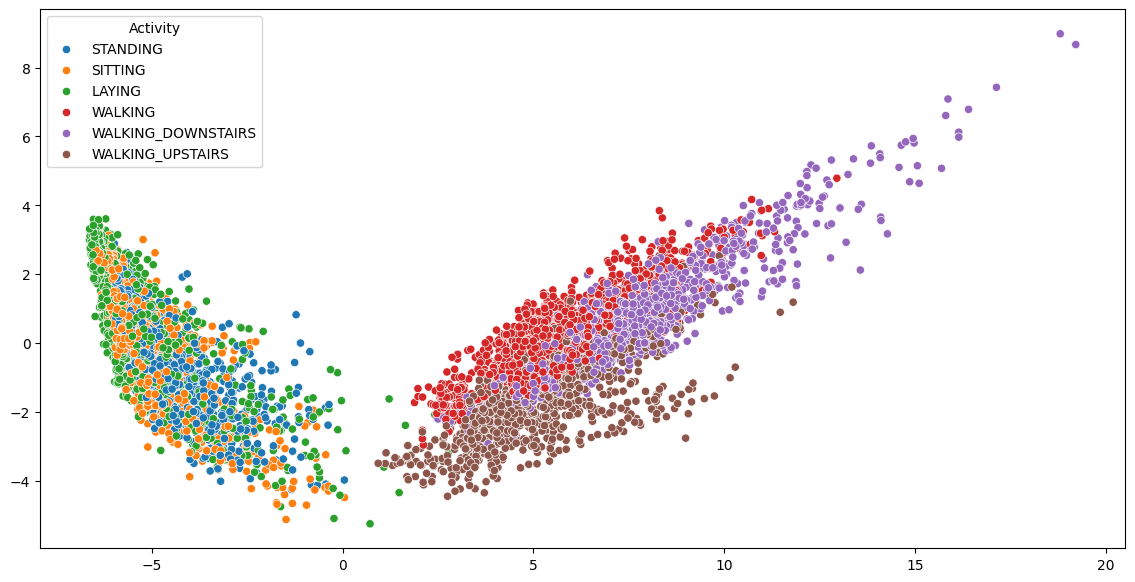

In [53]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue= 'Activity',data = train)

In [54]:
x_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_tsne)

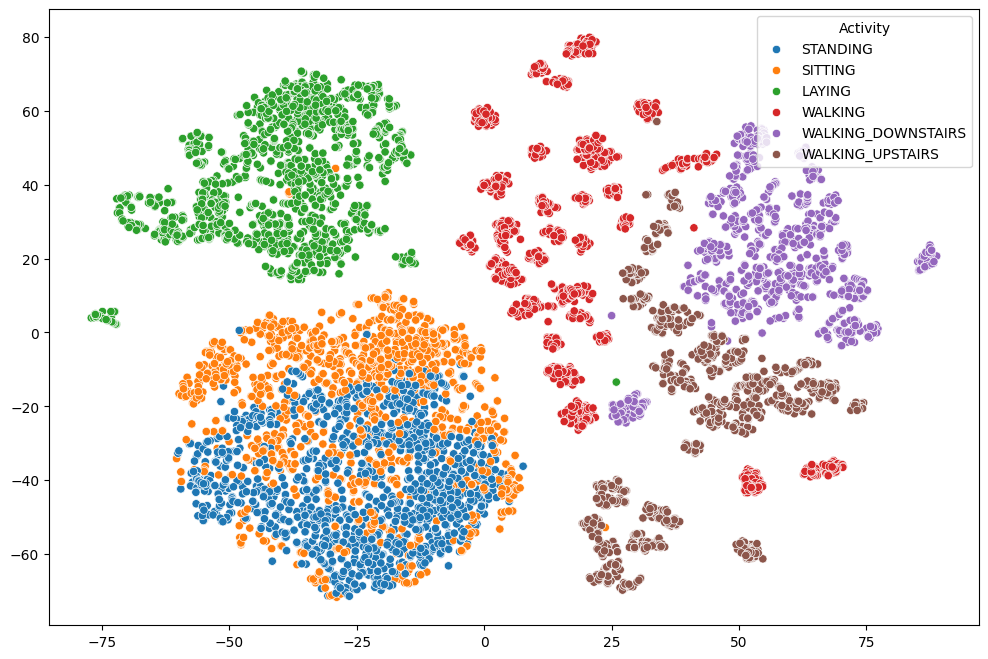

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

# **Splitting the Dataset for Model Training and Testing**

In [59]:
x_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train['Activity']

x_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test['Activity']

In [60]:
print('Training data size : ', x_train.shape)
print('Test data size : ', x_test.shape)

Training data size :  (7352, 561)
Test data size :  (999, 561)


In [61]:
def get_score(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  return model.score(x_test,y_test)

In [62]:
get_score(SVC(),x_train,x_test,y_train,y_test)

0.9429429429429429

In [63]:
get_score(LogisticRegression(),x_train,x_test,y_train,y_test)

0.953953953953954

In [64]:
get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

0.8328328328328328

In [65]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

0.9179179179179179

As accuracy of Logistics regression is more so we use Logistics regression for training purpose

In [67]:
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5, random_state=42)
lr_classifier_rs.fit(x_train, y_train)
y_pred_lr = lr_classifier_rs.predict(x_test)

In [68]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.954954954954955


In [78]:
cm = confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]])

<Axes: >

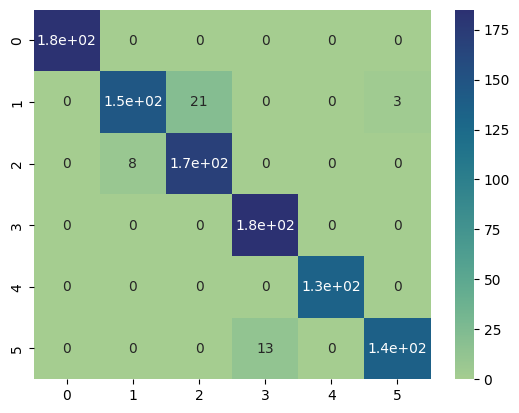

In [80]:
sns.heatmap(cm,annot =True,cmap="crest")